<a href="https://colab.research.google.com/github/rajy4683/EVAP2/blob/master/END_NoCoDeR_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import pandas as pd
import numpy as np
import fileinput
import re
import itertools
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
#import seaborn as sns
import dateutil.parser
import datetime
#from ipyfilechooser import FileChooser
import numpy as np
import os
import gzip
import dateutil.parser
from datetime import datetime
import sys
import glob
import matplotlib.dates as mdates
from datetime import timedelta
import ipywidgets as widgets
from IPython.display import display
import torch
import json
import random
import spacy
from pprint import pprint
import six
import sys, token, tokenize
import ast
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)
from torch.utils.data.distributed import DistributedSampler
#from tensorboardX import SummaryWriter
from tqdm import tqdm, trange

### NL PL Dataset

In [2]:
!cp /content/drive/MyDrive/EVA4/END_Capstone/english_python_data.txt .
!cp /content/drive/MyDrive/EVA4/END_Capstone/english_python_cleaned.txt .
!cp /content/drive/MyDrive/EVA4/END_Capstone/end_capstone.csv .

In [ ]:
with open('/content/english_python_data.txt','r') as f:
    output_data = f.readlines()
len(output_data)

In [ ]:
hash_lines_only=[]
for line in output_data:
    if(re.match(r'^#', line.lower(), re.IGNORECASE)):
        hash_lines_only.append(line)
print(len(hash_lines_only))

4387


In [ ]:
#main_regex=r'#\d+ write|^(#|#\s+)(write|define|python)|'
hash_lines=[]
for line in output_data:
    if(re.match(r'^(#|#\s+|## |#\d+)\w+', line.lower(), re.IGNORECASE)):
        hash_lines.append(line)
print(len(hash_lines))

4386


In [ ]:
pruned =[]
for line in hash_lines:
    if not re.search(r'write|python|program|function|^#\d+|define', line.lower(),re.IGNORECASE):
        pruned.append(line)
len(set(pruned))

136

In [ ]:
for obj in set(pruned):
    print(obj.rstrip())

In [ ]:
set(hash_lines_only) - set(hash_lines)

In [ ]:
### Converting the original code base to dataframes
with open('/content/english_python_data.txt','r') as f:
    output_data = f.readlines()
header = ""
nl_to_pl_pairs=[]
content=[]
for line in output_data:    
    #if("# write " in line.lower()):
    #if(re.match(r'^(#|#\s+|## |#\d+)\w+', line.lower(), re.IGNORECASE)):
    if(re.match(r'^#', line.lower(), re.IGNORECASE)):
        if(header != line): ### We have hit a new progam
            nl_to_pl_pairs.append([header, "".join(content)])
            content=[]
        header=line
    else:
        #print("Not ")
        content.append(line)
# for idx in range(20):
#     print(nl_to_pl_pairs[idx][0])
#     print(nl_to_pl_pairs[idx][1])

nl_to_pl_df = pd.DataFrame(nl_to_pl_pairs[2:], columns=['docstring','code'])
#nl_to_pl_df.loc[:,'docstring'] =nl_to_pl_df.loc[:,'docstring'].apply(lambda x: re.sub('# ','',x).strip('\n'))
#nl_to_pl_df.to_csv("end_capstone.csv", index=False)

In [ ]:
#nl_to_pl_df['docstring'] = nl_to_pl_df['docstring'].apply(lambda x: x.lower().lstrip('#').rstrip('\n'))
#nl_to_pl_df['docstring_len'] =
nl_to_pl_df['docstring_len'] =nl_to_pl_df['docstring'].apply(lambda x: len(x))
nl_to_pl_df['code_len'] = nl_to_pl_df['code'].apply(lambda x: len(x))
nl_to_pl_df['cleaned_code'] = nl_to_pl_df.apply(lambda x: remove_docstrings_comments(x.code, x.docstring), axis=1)
nl_to_pl_df['cleaned_code_len'] = nl_to_pl_df['cleaned_code'].apply(lambda x: len(x))

In [ ]:
nl_pl_df['code_len'].describe()

count    4364.000000
mean      173.705316
std       154.634218
min        11.000000
25%        81.000000
50%       132.000000
75%       216.000000
max      2443.000000
Name: code_len, dtype: float64

In [ ]:
nl_to_pl_df.to_csv("end_capstone.csv", index=False)

In [3]:
nl_to_pl_df = pd.read_csv("end_capstone.csv")

In [6]:
print(nl_to_pl_df['code_len'].max(),nl_to_pl_df['code_len'].min())
print(nl_to_pl_df['docstring_len'].max(),nl_to_pl_df['docstring_len'].min())
nl_to_pl_df[nl_to_pl_df['code_len'] ==0].count()

2443 11
313 16


docstring           0
code                0
docstring_len       0
code_len            0
cleaned_code        0
cleaned_code_len    0
dtype: int64

In [ ]:
!cp /content/end_capstone.csv /content/drive/MyDrive/EVA4/END_Capstone
!cp /content/english_python_data.txt /content/drive/MyDrive/EVA4/END_Capstone/english_python_cleaned.txt

In [ ]:
!cp /content/end_capstone.csv /content/drive/MyDrive/EVA4/END_Capstone

In [ ]:
nl_to_pl_df.loc[:,['docstring','code']]

,docstring,code
0,# write a python program to add two numbers\n,num1 = 1.5\nnum2 = 6.3\nsum = num1 + num2\npri...
1,# write a python function to add two user prov...,"def add_two_numbers(num1, num2):\n sum = nu..."
2,# write a program to find and print the larges...,\nnum1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 >=...
3,# write a program to find and print the smalle...,num1 = 10\nnum2 = 12\nnum3 = 14\nif (num1 <= n...
4,# Write a python function to merge two given l...,"def merge_lists(l1, l2):\n return l1 + l2\n..."
...,...,...
4359,# Write a python program to check if a number ...,"n = int(input(""Enter any number: ""))\nsum1 = 0..."
4360,# Write a python program to Check if a Number ...,"sum1 = 0\nnum = int(input(""Enter a number:""))\..."
4361,# Write a python to find LCM of two numbers\n,"a=int(input(""Enter the first number:""))\nb=int..."
4362,# Write python program to find whether-number-...,"def is_power_of_two(n):\n """"""Return True if..."


In [ ]:
nl_to_pl_df['code_len'].plot()

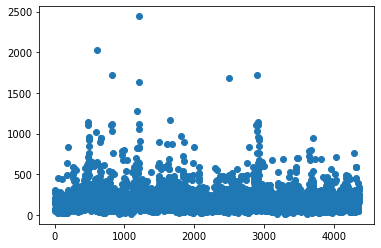

In [7]:
#nl_to_pl_df['code_len'].plot()
plt.scatter(nl_to_pl_df.index.values,nl_to_pl_df['code_len'])

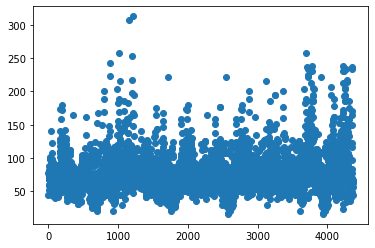

In [ ]:
plt.scatter(nl_to_pl_df.index.values,nl_to_pl_df['docstring_len'])

In [ ]:
nl_to_pl_df.query('code_len > 215').count()

docstring           1097
code                1097
docstring_len       1097
code_len            1097
cleaned_code        1097
cleaned_code_len    1097
dtype: int64

In [ ]:
for ix in nl_to_pl_df['docstring_len'].nlargest(30).index.values:
    print('#'+nl_to_pl_df.iloc[ix, 0])
    print(nl_to_pl_df.iloc[ix, 1])

In [ ]:
print(nl_to_pl_df.iloc[nl_to_pl_df['code_len'].idxmax(),:]['code'])

In [ ]:
#print(code_block)
print("".join(do_file(code_block)))

In [ ]:
#print("".join(do_file(my_df['code'][0])))
print(do_file(my_df['code'][0]))